In [1]:
import os, sys
currentdir = os.path.dirname(os.path.realpath(os.path.abspath("")))
scriptsdir = os.path.dirname(currentdir)
if scriptsdir not in sys.path:
    sys.path.append(scriptsdir)

from customscripts import configuration
from customscripts import utils

# Common imports

import numpy as np
import scipy as sp
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from pandas.plotting import autocorrelation_plot
human_formatter = ticker.FuncFormatter(utils.human_format)
%reload_ext autoreload
%autoreload 2

In [61]:
data_aggregates = utils.get_dataset_df(6, "mineral-production/2008-2018-all-aggregates")
data_alluminum = utils.get_dataset_df(6, "mineral-production/2008-2018-all-alluminum")
data_cement_finished = utils.get_dataset_df(6, "mineral-production/2008-2018-all-cement-finished")
data_coal = utils.get_dataset_df(6, "mineral-production/2008-2018-all-coal")
data_iron_ore = utils.get_dataset_df(6, "mineral-production/2008-2018-all-iron-ore")
data_nickel = utils.get_dataset_df(6, "mineral-production/2008-2018-all-nickel")
data_petroleum_crude = utils.get_dataset_df(6, "mineral-production/2008-2018-all-petroleum-crude")
# data_tantallium = utils.get_dataset_df(6, "mineral-production/2008-2018-all-tantallium")

In [62]:
data_aggregates = data_aggregates.drop(columns=["2008", "2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018"]).rename(columns={"Unnamed: 3": "2008", "Unnamed: 5": "2009", "Unnamed: 7": "2010", "Unnamed: 9": "2011", "Unnamed: 11": "2012", "Unnamed: 13": "2013", "Unnamed: 15": "2014", "Unnamed: 17": "2015", "Unnamed: 19": "2016", "Unnamed: 21": "2017", "Unnamed: 23": "2018"})
data_aggregates["Sub-commodity"] = "Rock, Sand and Gravel"
data_alluminum = data_alluminum.drop(columns=["2008", "2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018"]).rename(columns={"Unnamed: 3": "2008", "Unnamed: 5": "2009", "Unnamed: 7": "2010", "Unnamed: 9": "2011", "Unnamed: 11": "2012", "Unnamed: 13": "2013", "Unnamed: 15": "2014", "Unnamed: 17": "2015", "Unnamed: 19": "2016", "Unnamed: 21": "2017", "Unnamed: 23": "2018"})
data_alluminum["Sub-commodity"] = "Alluminum"
data_cement_finished = data_cement_finished.drop(columns=["2008", "2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "Unnamed: 24"]).rename(columns={"Unnamed: 3": "2008", "Unnamed: 5": "2009", "Unnamed: 7": "2010", "Unnamed: 9": "2011", "Unnamed: 11": "2012", "Unnamed: 13": "2013", "Unnamed: 15": "2014", "Unnamed: 17": "2015", "Unnamed: 19": "2016", "Unnamed: 21": "2017", "Unnamed: 23": "2018"})
data_coal["Sub-commodity"] = "Coal"
data_coal = data_coal.drop(columns=["2008", "2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018"]).rename(columns={"Unnamed: 3": "2008", "Unnamed: 5": "2009", "Unnamed: 7": "2010", "Unnamed: 9": "2011", "Unnamed: 11": "2012", "Unnamed: 13": "2013", "Unnamed: 15": "2014", "Unnamed: 17": "2015", "Unnamed: 19": "2016", "Unnamed: 21": "2017", "Unnamed: 23": "2018"})
data_iron_ore["Sub-commodity"] = "Iron"
data_iron_ore = data_iron_ore.drop(columns=["2008", "2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018"]).rename(columns={"Unnamed: 3": "2008", "Unnamed: 5": "2009", "Unnamed: 7": "2010", "Unnamed: 9": "2011", "Unnamed: 11": "2012", "Unnamed: 13": "2013", "Unnamed: 15": "2014", "Unnamed: 17": "2015", "Unnamed: 19": "2016", "Unnamed: 21": "2017", "Unnamed: 23": "2018"})
data_nickel["Sub-commodity"] = "Nickel"
data_nickel = data_nickel.drop(columns=["2008", "2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018"]).rename(columns={"Unnamed: 3": "2008", "Unnamed: 5": "2009", "Unnamed: 7": "2010", "Unnamed: 9": "2011", "Unnamed: 11": "2012", "Unnamed: 13": "2013", "Unnamed: 15": "2014", "Unnamed: 17": "2015", "Unnamed: 19": "2016", "Unnamed: 21": "2017", "Unnamed: 23": "2018"})
data_petroleum_crude["Sub-commodity"] = "Crude Petroleum"
data_petroleum_crude = data_petroleum_crude.drop(columns=["2008", "2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018"]).rename(columns={"Unnamed: 3": "2008", "Unnamed: 5": "2009", "Unnamed: 7": "2010", "Unnamed: 9": "2011", "Unnamed: 11": "2012", "Unnamed: 13": "2013", "Unnamed: 15": "2014", "Unnamed: 17": "2015", "Unnamed: 19": "2016", "Unnamed: 21": "2017", "Unnamed: 23": "2018"})
data_all = pd.concat([data_aggregates, data_alluminum, data_cement_finished, data_coal, data_iron_ore, data_nickel, data_petroleum_crude])
data_all = utils.abbreviate_countries(data_all, "Country")
data_all_long = data_all.melt(id_vars=["Country", "Sub-commodity"], var_name="Year", value_name="Production (metric tonnes)")

In [88]:
data_all_long.to_csv("2008-2018-production-main-minerals.csv")

In [85]:
data_all_long["Sub-commodity"].unique()

array(['Rock, Sand and Gravel', 'Alluminum', 'Cement, finished', 'Coal',
       'Iron', 'Nickel', 'Crude Petroleum'], dtype=object)

<AxesSubplot:xlabel='Year', ylabel='Production (metric tonnes)'>

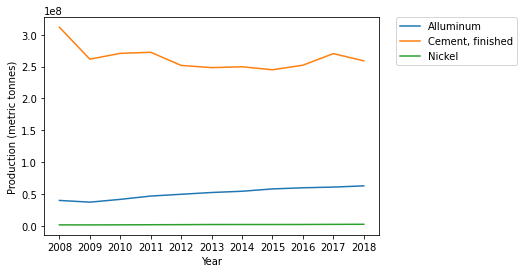

In [86]:
sns.lineplot(data=data_all_long[data_all_long["Sub-commodity"].isin(["Cement, finished", "Nickel", "Alluminum"])].groupby(["Sub-commodity", "Year"])["Production (metric tonnes)"].sum().reset_index(), x="Year", y="Production (metric tonnes)", hue="Sub-commodity")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [87]:
data_all_long[data_all_long["Sub-commodity"].isin(["Cement, finished"])].groupby(["Sub-commodity", "Year"])["Production (metric tonnes)"].sum().reset_index()

,Sub-commodity,Year,Production (metric tonnes)
0,"Cement, finished",2008,311680680.0
1,"Cement, finished",2009,261534852.0
2,"Cement, finished",2010,270691270.0
3,"Cement, finished",2011,272384714.0
4,"Cement, finished",2012,251727540.0
5,"Cement, finished",2013,248265078.0
6,"Cement, finished",2014,249631100.0
7,"Cement, finished",2015,244908243.0
8,"Cement, finished",2016,252108652.0
9,"Cement, finished",2017,270278876.0
